In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
# from pycaret.nlp import *
from pycaret.classification import *

# Importation du fichier kaggle

In [3]:
df_train_kaggle = pd.read_csv('../data/kaggle.csv')
df_train_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [4]:
df_train, df_test,= train_test_split(df_train_kaggle, test_size=0.20 ,random_state=42)


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer(strip_accents='ascii', lowercase=True, stop_words='english' ,max_df=0.9, min_df=2)
# On commence avec un preprocessing minimal (lower, token = word)
X_train_counts = count_vect.fit_transform(df_train.Text)
print(f"dimension de la matrice de comptage: {X_train_counts.shape}")
df_new_train = pd.DataFrame(X_train_counts.toarray())
df_new_train['Emotion'] = df_train.Emotion

dimension de la matrice de comptage: (17167, 7703)


In [6]:
df_new_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,7454,7455,7456,7457,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,7500,7501,7502,7503,7504,7505,7506,7507,7508,7509,7510,7511,7512,7513,7514,7515,7516,7517,7518,7519,7520,7521,7522,7523,7524,7525,7526,7527,7528,7529,7530,7531,7532,7533,7534,7535,7536,7537,7538,7539,7540,7541,7542,7543,7544,7545,7546,7547,7548,7549,7550,7551,7552,7553,7554,7555,7556,7557,7558,7559,7560,7561,7562,7563,7564,7565,7566,7567,7568,7569,7570,7571,7572,7573,7574,7575,7576,7577,7578,7579,7580,7581,7582,7583,7584,7585,7586,7587,7588,7589,7590,7591,7592,7593,7594,7595,7596,7597,7598,7599,7600,7601,7602,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612,7613,7614,7615,7616,7617,7618,7619,7620,7621,7622,7623,7624,7625,7626,7627,7628,7629,7630,7631,7632,7633,7634,7635,7636,7637,7638,7639,7640,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,Emotion
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sadness
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
s = setup(df_new_train, target = 'Emotion')

,Description,Value
0,session_id,4952
1,Target,Emotion
2,Target Type,Multiclass
3,Label Encoded,"anger: 0, fear: 1, happy: 2, love: 3, sadness: 4, surprise: 5"
4,Original Data,"(17167, 7704)"
5,Missing Values,1
6,Numeric Features,0
7,Categorical Features,7703
8,Ordinal Features,0
9,High Cardinality Features,0


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.3330,0.5000,0.1667,0.1109,0.1664,0.0000,0.0000,0.1220
ada,Ada Boost Classifier,0.3263,0.5000,0.1648,0.2287,0.1776,-0.0035,-0.0102,7.2550
gbc,Gradient Boosting Classifier,0.3180,0.4944,0.1645,0.2293,0.2046,-0.0024,-0.0041,163.5390
lightgbm,Light Gradient Boosting Machine,0.3067,0.4992,0.1691,0.2404,0.2516,0.0061,0.0067,2.9720
rf,Random Forest Classifier,0.2838,0.5005,0.1641,0.2345,0.2475,-0.0047,-0.0049,17.9230
et,Extra Trees Classifier,0.2691,0.4958,0.1650,0.2359,0.2479,-0.0008,-0.0008,25.4200
ridge,Ridge Classifier,0.2637,0.0000,0.1612,0.2311,0.2431,-0.0080,-0.0081,4.9870
dt,Decision Tree Classifier,0.2510,0.4998,0.1644,0.2367,0.2429,-0.0004,-0.0004,26.9200
svm,SVM - Linear Kernel,0.2442,0.0000,0.1691,0.1343,0.1651,-0.0005,-0.0002,27.0310
knn,K Neighbors Classifier,0.2394,0.5029,0.1718,0.2446,0.2369,0.0095,0.0096,52.2840


In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
best

DummyClassifier(constant=None, random_state=4952, strategy='prior')

In [9]:
# Model	Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC	TT (Sec)
# lr	Logistic Regression	0.3281	0.4998	0.1670	0.1486	0.1626	0.0007	0.0101	21.5800
# knn	K Neighbors Classifier	0.3275	0.5000	0.1668	0.1553	0.1625	-0.0001	-0.0006	265.3050
# nb	Naive Bayes	0.0390	0.4997	0.1654	0.0671	0.0037	-0.0005	-0.0069	5.2680

In [10]:
df_train_kaggle.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

Text(-14.915000000000006, 0.5, 'Count')

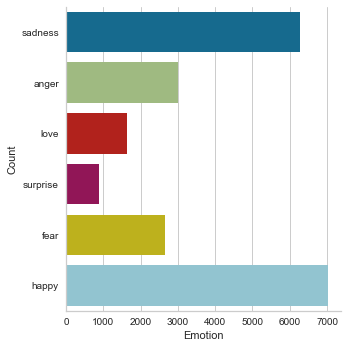

In [11]:
sns.catplot(y='Emotion', kind='count', data=df_train_kaggle) 
plt.xlabel("Emotion") 
plt.ylabel("Count") 

In [12]:
h2o.init()

NameError: name 'h2o' is not defined

In [ ]:
h2o_df = h2o.H2OFrame(df_train_kaggle)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_df.describe()

Rows:21459
Cols:2




,Text,Emotion
type,string,enum
mins,NaN,
mean,NaN,
maxs,NaN,
sigma,NaN,
zeros,0,
missing,0,0
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger


In [ ]:
train, test = h2o_df.split_frame(ratios = [0.80])

In [ ]:
x= train.columns

y = 'Emotion'

x.remove(y)

In [ ]:
df_train_kaggle.Emotion.value_counts(normalize=True)

happy       0.327555
sadness     0.291952
anger       0.139475
fear        0.123585
love        0.076471
surprise    0.040962
Name: Emotion, dtype: float64

In [ ]:
aml = H2OAutoML(max_runtime_secs=240, balance_classes=True, stopping_metric='logloss', project_name='Final',seed = 123)

%time aml.train(x= x, y= y, training_frame=train)


AutoML progress: |
14:00:19.524: AutoML: XGBoost is not available; skipping it.
14:00:19.605: _train param, Dropping bad and constant columns: [Text]
14:00:19.605: _train param, Training data must have at least 2 features (incl. response).
14:00:19.647: _train param, Dropping bad and constant columns: [Text]
14:00:19.647: _train param, Training data must have at least 2 features (incl. response).
14:00:19.665: _train param, Dropping bad and constant columns: [Text]
14:00:19.665: _train param, Training data must have at least 2 features (incl. response).
14:00:19.692: _train param, Dropping bad and constant columns: [Text]
14:00:19.692: _train param, Training data must have at least 2 features (incl. response).
14:00:19.700: _train param, Dropping bad and constant columns: [Text]
14:00:19.700: _train param, Training data must have at least 2 features (incl. response).
14:00:19.721: _train param, Dropping bad and constant columns: [Text]
14:00:19.722: _train param, Training data must hav

OSError: Job with key $03017f00000132d4ffffffff$_916bde3bfd8a7f73ba3310b87b104d3e failed with an exception: water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
stacktrace: 
water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
	at ai.h2o.automl.AutoML.learn(AutoML.java:767)
	at ai.h2o.automl.AutoML.run(AutoML.java:485)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:33)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1668)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)
